Welcome to this workshop on Unsupervised learning. We have seen in the slides what Unsupervised learning is, what it is commonly used for, what types there are and what are some still unsolved challenges. 

The focus of this week is going to be clsutering. We will focus on 3 types of clustering approaches: 
- Kmeans
- Hierarchical clustering
- Anomaly detection techniques

Remember that clustering is the goal of splitting the data into groups (clusters), where observations within a cluster are as similiar as possible. 


In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
# Define the data
raw_data = load_diabetes()
data = pd.DataFrame( np.c_[raw_data['data'], raw_data['target']],
                     columns= raw_data['feature_names'] + ['target'])
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## K-means

**K-means** is one of the simplest and commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. In a nutshell, the algorithm works in the following way:

- You specify the number of clusters within the data, and the algorithm selects data points at random as the respective clusters (if we select 3 clusters, 3 random points will be the initial cluster centers).
- Then, teratively: each data point is assigned to the cluster center closest to it (distance is measured by Euclidean, Manhattan, etc.).
- Then cluster centers are updated (recomputed) to be the mean of the assigned points.
- After the update, some points might change the cluster to which they are assigned.
- The process is repeated until the cluster centers no longer change.

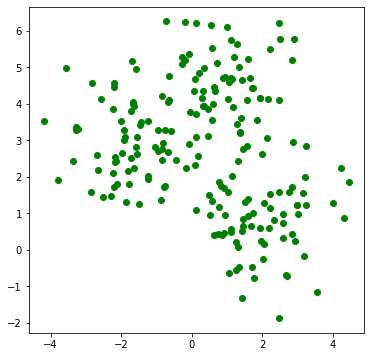

In [6]:
# Using K-means on artificial data

from sklearn.datasets import make_blobs

X_blob, y = make_blobs(n_samples=200, centers=3, random_state=0)

plt.figure(figsize=(6, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], color='green')

In [15]:
print(X_blob.shape)
print(len(y))

(200, 2)
200


**Q1.** Apply K-means to the artifically created data set. Re-create the plot from above, making sure to color by the cluster assignment (so that each cluster will be in a different color). 

    - Hint: You may want to use the KMeans module from sklearn.cluster. You need to specify the number of clusters n_clusters, which in this case is 3 (as we created 3 clusters).

In [7]:
from sklearn.cluster import KMeans

kmeans_blob = KMeans(n_clusters=3)
kmeans_blob.fit(X_blob)
y_kmeans = kmeans_blob.predict(X_blob)

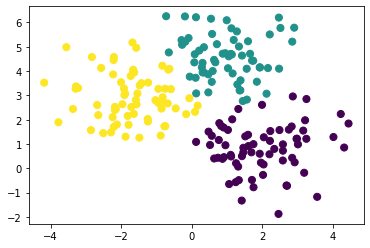

In [17]:
# Let's plot the degenrated dataset again, coloring by the predicted clusters.
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50)

**Q1.1** Extract the centroids (the cluster centers) and mark them on the plot. 

[[ 1.98410174  0.81302038]
 [ 0.97692125  4.56883102]
 [-1.71656153  2.91261167]]


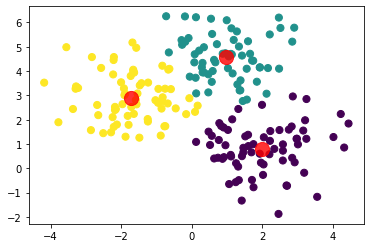

In [20]:
#We can extract the cluster centers
centers = kmeans_blob.cluster_centers_
print(centers)
# We can also add the cluster centers to the plot

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)

**Q2.** In the artifical data use case, we knew there would be 3 clusters since we created 3 clusters. However, in reality one of the biggest difficulties is to figure out the appropriate number of clusters. 
Let's repeat the k-means clustering algorithm on the diabetes dataset. 

        Q2.1. Create a feature matrix X and fit a K-means algorithm to it. Specidy 4 clusters. We will later optimize for the number of clusters, so do not worry about that number much - just yet. 

In [33]:
y = data.target
X = data.drop('target', axis=1)

# Fit a simple KMeans algorithm 
kmeans = KMeans(n_clusters=4, random_state=1).fit(X)

#To inspect the centroid values generated by the algorithm 
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.04811432 -0.02249618 -0.03544841 -0.04165267 -0.04634997 -0.04194726
   0.01171216 -0.03765578 -0.04172408 -0.04074151]
 [ 0.01791888  0.01236451  0.02243003  0.01751814  0.05910786  0.0561458
  -0.02369326  0.05472386  0.04615801  0.03201855]
 [ 0.01299646  0.0226059   0.02253324  0.01846879 -0.01540388 -0.00824497
  -0.028233    0.01079071  0.01158404  0.01435591]
 [ 0.01092746 -0.0245739  -0.02177183 -0.00378609  0.00851171 -0.00389818
   0.05662344 -0.03609848 -0.02388109 -0.01398363]]


Each training point is assigned a label, which you can inspect.

In [22]:
print('Cluster membership: \n{}'.format(kmeans.labels_))

Cluster membership: 
[2 3 2 2 3 0 0 1 2 2 0 2 3 2 3 1 3 1 0 3 0 0 0 1 0 2 0 0 0 2 0 0 2 3 0 3 3
 3 1 2 1 0 2 3 2 2 0 0 3 2 3 2 3 3 3 3 2 0 3 1 0 2 3 0 2 2 2 2 2 0 3 2 1 1
 2 2 2 0 0 0 1 2 3 0 0 3 0 3 0 3 3 1 3 0 0 0 2 1 3 3 1 3 3 1 0 2 0 2 2 2 3
 3 0 1 2 1 2 1 1 3 0 2 1 1 3 2 0 3 0 1 2 0 2 0 3 2 0 2 2 2 2 1 1 3 1 2 2 2
 2 2 2 3 1 2 2 1 0 1 0 2 0 1 0 2 3 0 0 1 1 1 3 0 1 0 2 3 2 1 3 1 2 3 1 2 2
 2 1 0 3 3 2 0 3 1 0 1 3 2 0 3 3 3 1 1 2 2 2 2 1 2 3 3 3 3 3 2 1 1 0 0 0 0
 2 0 0 2 0 3 0 3 1 3 1 3 2 2 1 3 2 1 2 2 0 2 0 0 3 0 1 1 2 1 1 1 1 3 2 3 1
 2 3 3 2 0 2 2 3 1 1 3 2 2 0 1 2 2 1 0 2 3 2 0 1 0 2 1 0 1 3 1 2 1 0 2 2 2
 3 0 0 2 2 2 1 1 1 2 2 1 0 1 2 1 0 1 3 3 2 1 3 3 1 1 1 1 1 1 2 2 2 3 2 2 2
 2 0 3 1 2 0 1 3 2 2 3 1 1 1 2 3 0 2 0 0 1 1 2 3 2 0 2 2 3 2 2 2 2 1 1 1 2
 3 1 3 0 0 2 1 2 2 0 2 0 2 2 1 2 3 0 2 0 2 0 2 0 2 0 0 2 3 2 3 3 2 2 2 2 0
 2 1 1 1 0 2 3 1 1 2 0 3 0 2 1 1 1 2 0 1 0 1 3 3 3 1 3 3 0 0 2 1 2 2 3]


        Q 2.2. Find out the optimal number of clusters. Plot the number of clusters on one axis and the intertia on the other. Look for the 'elbow' in the plot. 
        Hint: you can find the intertia by using the kmeans.intertia_ method.
        Hint2: you may want to use a for loop here. Use a range (1, 10). 

In [27]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia value')

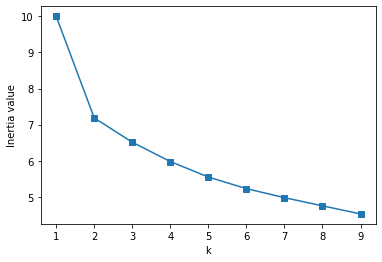

In [28]:
plt.plot(range(1, 10), inertia, marker='s')
plt.xlabel('k')
plt.ylabel('Inertia value')

**Bonus question**: How many clusters should we have, i.e. where do you see 'an elbow'? 

### Hierarchical clustering

It's a bottom-down approach: each sample is in a cluster of its own. We iteratively start merging the clusters closest to each other. In the end, all the samples are in a single cluster.

**Q3.** Using the feature matrix X from the diabetes dataset (select only 50 observations from it in fact, in order to have everything readable), plot the dendogram. 

Note: One important parameter is the method in the **linkage** function. The linkage measures the distance, or similarity between clusters, or an obsetvation and a cluster. 
For instance, method == 'complete' means distance between clusters is the max distance between the samples in the clusters. Specify method='complete' at first. 
'Metric' on the other hand measurs the distance between single observations. The default is 'Euclidean', and leave that for now. 

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_complete = linkage(X.loc[:50,:], method='complete')

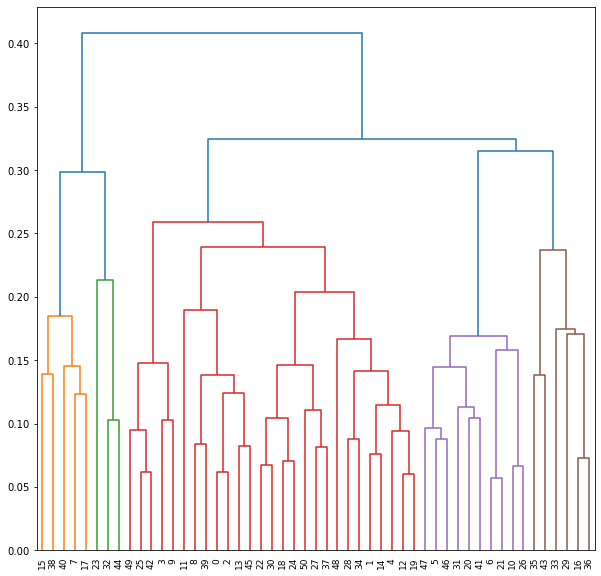

In [37]:
plt.figure(figsize=(10, 10))
dendrogram(merge_complete, leaf_font_size=9, leaf_rotation=90)
plt.show()

**Q4.** 
Linkage == single uses the minimal intercluster dissimilarity (so like opposite of complete). Single linkage can result in extended, trailing clusters in which observations are fused one-at-a-time. Repeat the above analysis, specifying 'single' as the method. 


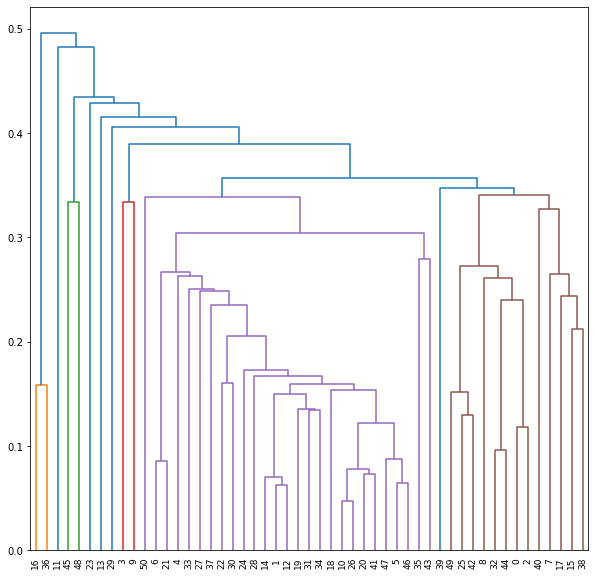

In [38]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_single = linkage(X.loc[:50,:], metric='cosine')
plt.figure(figsize=(10, 10))
dendrogram(merge_single, leaf_font_size=9, leaf_rotation=90)
plt.show()

**Q5**. Linkage == average takes the mean of the intercluster dissimilarity.
Repeat the analysis using 'average' as a method.

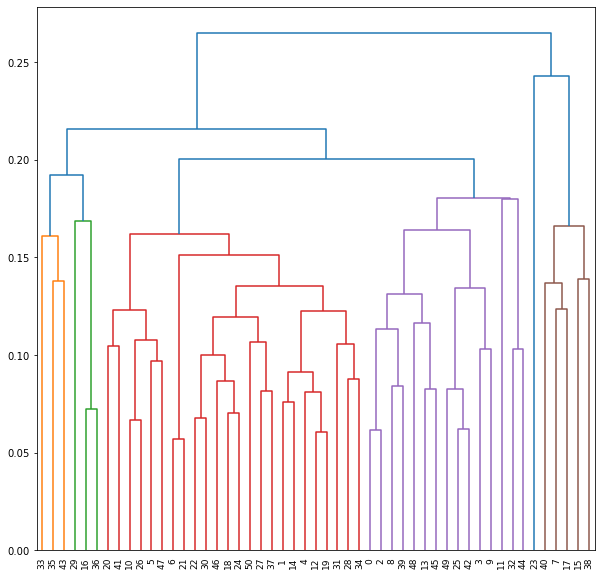

In [39]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_single = linkage(X.loc[:50,:], method='average')
plt.figure(figsize=(10, 10))
dendrogram(merge_single, leaf_font_size=9, leaf_rotation=90)
plt.show()

**Q6**.Linkage== 'ward' is based on the sum of squares (more precisely, Ward variance minimization algorithm.)
Repeat the analysis with such a method.

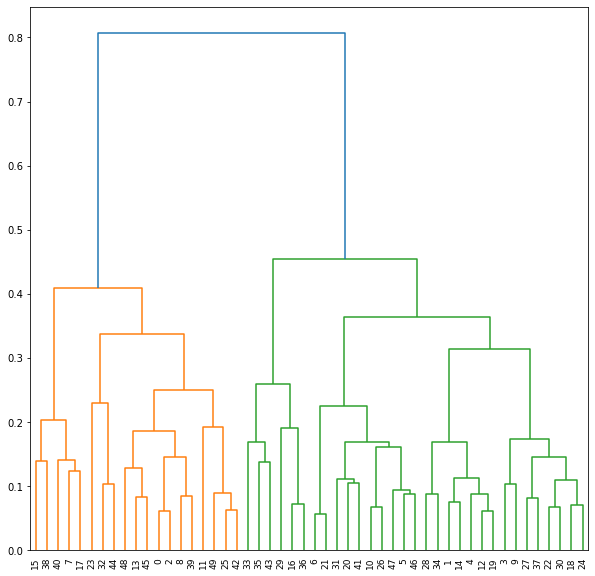

In [42]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
merge_single = linkage(X.iloc[:50,:], method='ward')
plt.figure(figsize=(10, 10))
dendrogram(merge_single, leaf_font_size=9, leaf_rotation=90)
plt.show()

## DBSCAN

DBSCAN stands for density-based spatial clustering of applications with noise. It can capture clusters of complex shapes (no need to specify number of clusters a priori), and it can identify points that are not a part of any clusters, i.e. 'NOISE'. 

**How it works**:
It works by identifying points that are in 'crowded' regions of the data space. These regions are referred to as *dense* regions. Points within a dense sample are called *core samples*. There are two important parameters: **min_samples** and **eps**. If there are at least **min_samples** many data points within a distance of **eps** to a given data point, that data point is classified as a core sample. 

The algorithm works by picking an arbitrary point to start with. It then finds all points of distance eps or less from that point. If there are less than min_samples points within distance eps of the starting point, this point is labelled as *noise*, meaning that it does not belong to any cluster. If there are more than min_samples points within a distance of eps, the data point is labelled as a core sample and assigned a new cluster label. Then all neighbors (within eps) of the data point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. The cluster grows until there are no more core samples within distance eps of the cluster. 

Then another point that has not been visited is picked and the procedure is repeated.

In the end there are 3 kinds of points: core points, points that are within distance eps of core points (called boundary points) and noise. 

Let's train a DBSCAN with the default settings on the synthetic data. Remember that we created 3 clusters. 

In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_blob)
print(np.unique(clusters))

[-1  0  1  2  3  4  5]


The default parameters result in 7 clusters- too many! Let's see how the number of clusters change as we change eps and min_samples. 

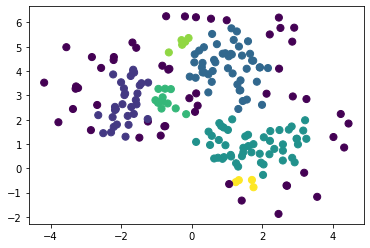

In [50]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=clusters, s=50)

**Q7.** Optimize the hyperparameters of DBSCAN, and count the number of unique clusters as a result of using the hyperparameters of interest. 
To reproduce my answer, you can use min_samples in [10, 15, 20, 50] and eps in [0.01, 0.1, 0.3, 1, 5].

In [69]:
for min_sample in [10, 15, 20, 50]:
    for eps in [0.01, 0.1, 0.3, 1, 5]:
        clusters = DBSCAN(eps=eps, min_samples=min_sample).fit_predict(X_blob)
        print('The min_samples are:', min_sample, '\n', 'Epsilon is: ', eps, '\n', 'Number of clusters: ', len(np.unique(clusters)))
        print('__________')

The min_samples are: 10 
 Epsilon is:  0.01 
 Number of clusters:  1
__________
The min_samples are: 10 
 Epsilon is:  0.1 
 Number of clusters:  1
__________
The min_samples are: 10 
 Epsilon is:  0.3 
 Number of clusters:  1
__________
The min_samples are: 10 
 Epsilon is:  1 
 Number of clusters:  2
__________
The min_samples are: 10 
 Epsilon is:  5 
 Number of clusters:  1
__________
The min_samples are: 15 
 Epsilon is:  0.01 
 Number of clusters:  1
__________
The min_samples are: 15 
 Epsilon is:  0.1 
 Number of clusters:  1
__________
The min_samples are: 15 
 Epsilon is:  0.3 
 Number of clusters:  1
__________
The min_samples are: 15 
 Epsilon is:  1 
 Number of clusters:  3
__________
The min_samples are: 15 
 Epsilon is:  5 
 Number of clusters:  1
__________
The min_samples are: 20 
 Epsilon is:  0.01 
 Number of clusters:  1
__________
The min_samples are: 20 
 Epsilon is:  0.1 
 Number of clusters:  1
__________
The min_samples are: 20 
 Epsilon is:  0.3 
 Number of cl

It seems that an eps=1 and min_samples=15 or min_samples=20 results in the expected number of clusters. 

**Q8.** Create a scatter plot of the blob data, colored by the cluster labels chosen by DBSCAN with eps and min_samples from the above options. 

What stands out in the plot for you? 

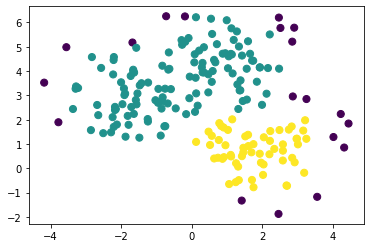

In [74]:
clusters = DBSCAN(eps=1, min_samples=15).fit_predict(X_blob)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=clusters, s=50)

**Q9**. SELF/ON YOUR OWN.

Train a DBSCAN algorithm for the diabetes data set. In this case we do not know how many clusters to expect. Try to experiment with the eps and min_samples and explore the datapoints that are assigned as 'noise'. Does it make sense to you that they are assigned as noise? 